## About the Data
The data set is compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic sepcturm.

Inspiration - Suicide Prevention

The data set contains 27820 data points and 12 features. 

Source - Kaggle

In [1]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 26 kB/s 
     |████████████████████████████████| 198 kB 64.2 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=bea32969f5e9fccb9af77be78aa703f058cbf3b1001e93aa50123e89757198d2
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [4]:
import pyspark
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#creating spark session:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('finalproject').getOrCreate()

print(spark)

In [6]:
#defining the schema
from pyspark.sql.types import StructType,StructField, StringType, IntegerType,FloatType

schema = StructType([ \
    StructField("country",StringType(),True), \
    StructField("year",IntegerType(),True), \
    StructField("sex",StringType(),True), \
    StructField("age", StringType(), True), \
    StructField("suicides_no", IntegerType(), True), \
    StructField("population", IntegerType(), True), \
    StructField("suicides/100k pop", FloatType(), True),\
    StructField("country-year", StringType(), True),\
    StructField("HDI for year", StringType(), True),\
    StructField("gdp_for_year ($)", StringType(), True),\
    StructField("gdp_per_capita ($)", IntegerType(), True),\
    StructField("generation", StringType(), True),

  ])

In [7]:
file_path = "/content/master.csv"
df = spark.read.csv(file_path,header = True,schema = schema)
df.show(10)

+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+----------------+------------------+---------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|country-year|HDI for year|gdp_for_year ($)|gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+----------------+------------------+---------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71| Albania1987|        null|   2,156,624,900|               796|   Generation X|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19| Albania1987|        null|   2,156,624,900|               796|         Silent|
|Albania|1987|female|15-24 years|         14|    289700|             4.83| Albania1987|        null|   2,156,624,900|               796|   Generation X|
|Albania|1987|  male|  75+ years|          1|     21800|             4.59| Albania

In [8]:
df.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: float (nullable = true)
 |-- country-year: string (nullable = true)
 |-- HDI for year: string (nullable = true)
 |-- gdp_for_year ($): string (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



In [9]:
df.dtypes
print("Data Type associated with different columns in the dataframe:")
print(df.dtypes)

print("\nNumber of rows and columns in the dataframe are:")
print((df.count(), len(df.columns)))

#checking the names of the columns in dataframe:
df.columns
print("\nList of the columns conatined by the dataframe:")
print(df.columns)

Data Type associated with different columns in the dataframe:
[('country', 'string'), ('year', 'int'), ('sex', 'string'), ('age', 'string'), ('suicides_no', 'int'), ('population', 'int'), ('suicides/100k pop', 'float'), ('country-year', 'string'), ('HDI for year', 'string'), ('gdp_for_year ($)', 'string'), ('gdp_per_capita ($)', 'int'), ('generation', 'string')]

Number of rows and columns in the dataframe are:
(27820, 12)

List of the columns conatined by the dataframe:
['country', 'year', 'sex', 'age', 'suicides_no', 'population', 'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)', 'gdp_per_capita ($)', 'generation']


In [10]:
#getting the summary statistics
df.summary().show()

+-------+----------+------------------+------+-----------+------------------+------------------+------------------+--------------+-------------------+-----------------+------------------+----------+
|summary|   country|              year|   sex|        age|       suicides_no|        population| suicides/100k pop|  country-year|       HDI for year| gdp_for_year ($)|gdp_per_capita ($)|generation|
+-------+----------+------------------+------+-----------+------------------+------------------+------------------+--------------+-------------------+-----------------+------------------+----------+
|  count|     27820|             27820| 27820|      27820|             27820|             27820|             27820|         27820|               8364|            27820|             27820|     27820|
|   mean|      null|2001.2583752695903|  null|       null|242.57440690150972|1844793.6173975556|12.816097409101264|          null| 0.7766011477761785|             null|16866.464414090584|      null|
| std

Looking at the statitics,all the features are in good order. However, it's suspicious that suicide rates in an given year is zero. 


In [11]:
#filtering dataframe based on suicies_no == 0:
df.filter(df.suicides_no == 0).show(7)

+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+----------------+------------------+---------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|country-year|HDI for year|gdp_for_year ($)|gdp_per_capita ($)|     generation|
+-------+----+------+-----------+-----------+----------+-----------------+------------+------------+----------------+------------------+---------------+
|Albania|1987|female| 5-14 years|          0|    311000|              0.0| Albania1987|        null|   2,156,624,900|               796|   Generation X|
|Albania|1987|female|55-74 years|          0|    144600|              0.0| Albania1987|        null|   2,156,624,900|               796|G.I. Generation|
|Albania|1987|  male| 5-14 years|          0|    338200|              0.0| Albania1987|        null|   2,156,624,900|               796|   Generation X|
|Albania|1988|female| 5-14 years|          0|    317200|              0.0| Albania

It is not the total number of suicide which is zero. For a particular age category, the sucidial numbers are zero. 

Well that makes more sense.


**Checking for Null Values**

- isnan() is a function of the pysparq.sql.function package, we have to set which column we want to use as an argument of the function. <br>

- isNull()" belongs to pyspark.sql.Column package, to check the null status of a column

In [12]:
from pyspark.sql.functions import isnan, when, count, col

df.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+-------+----+---+---+-----------+----------+-----------------+------------+------------+----------------+------------------+----------+
|country|year|sex|age|suicides_no|population|suicides/100k pop|country-year|HDI for year|gdp_for_year ($)|gdp_per_capita ($)|generation|
+-------+----+---+---+-----------+----------+-----------------+------------+------------+----------------+------------------+----------+
|      0|   0|  0|  0|          0|         0|                0|           0|       19456|               0|                 0|         0|
+-------+----+---+---+-----------+----------+-----------------+------------+------------+----------------+------------------+----------+



- Column "HDI for year" contains 19456 null entires. Total number of rows are 27820 out of which 19456 is null values which is 69.94 % of the total. 

- Column "country-year" is not a necessary column for the analysis

- Dropping these two columns.

In [13]:
df = df.drop("HDI for year","country-year","gdp_for_year ($)")
#df = df.drop("HDI for year","country-year").printSchema()

#creating a copy of the cleaned datadrame:
data_clean = df.select("*")

In [14]:
print("Final number of rows and columns for analysis:")
print(data_clean.count(),",", len(data_clean.columns))

Final number of rows and columns for analysis:
27820 , 9


### Exploratory Data Analysis

In [15]:
#print(data_clean.show(5))
#data_clean.printSchema()

Calculating the count of category in columns: Age, Country, Generation, Sex to get the stastics about the count of each category

In [16]:
data_clean.groupBy("age").count().show()

+-----------+-----+
|        age|count|
+-----------+-----+
|55-74 years| 4642|
|25-34 years| 4642|
| 5-14 years| 4610|
|  75+ years| 4642|
|15-24 years| 4642|
|35-54 years| 4642|
+-----------+-----+



In [17]:
data_clean.groupBy("sex").count().show()

+------+-----+
|   sex|count|
+------+-----+
|female|13910|
|  male|13910|
+------+-----+



In [18]:
data_clean.groupBy("country").count().sort("count", ascending = False).show()

+-----------------+-----+
|          country|count|
+-----------------+-----+
|        Mauritius|  382|
|      Netherlands|  382|
|          Iceland|  382|
|          Austria|  382|
|      Puerto Rico|  372|
|            Italy|  372|
|            Chile|  372|
|        Singapore|  372|
|        Argentina|  372|
|            Spain|  372|
|           Brazil|  372|
|Republic of Korea|  372|
|       Luxembourg|  372|
|           Israel|  372|
|          Belgium|  372|
|    United States|  372|
|            Malta|  372|
|            Japan|  372|
|           Greece|  372|
|          Ecuador|  372|
+-----------------+-----+
only showing top 20 rows



In [19]:
data_clean.groupBy("generation").count().sort("count", ascending = False).show()

+---------------+-----+
|     generation|count|
+---------------+-----+
|   Generation X| 6408|
|         Silent| 6364|
|     Millenials| 5844|
|        Boomers| 4990|
|G.I. Generation| 2744|
|   Generation Z| 1470|
+---------------+-----+



## Visualisations:
Now, I have performed visualisations using matplotlib and seaborn libraries. Some of the graphs can be found below. 
However, majority of my graphs were created using Tableau and insights were drawn from them. 
I have added all that in my presentation.

Below are just a few visualisation I have prepared using matplotlib and seaborn

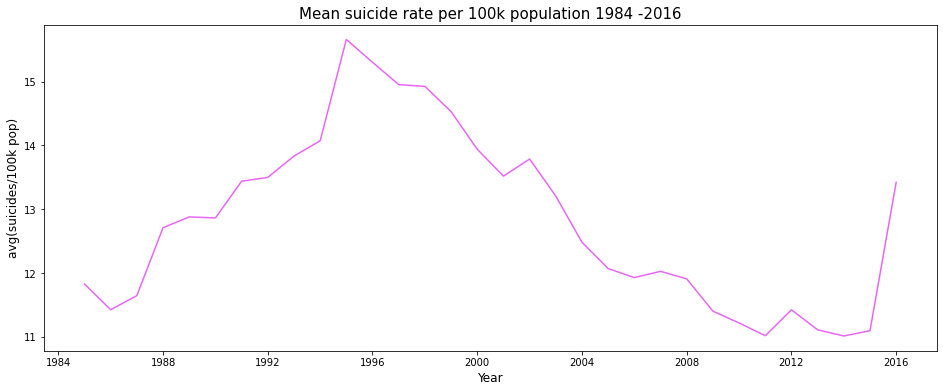

In [20]:
from google.colab import files


#grouping the data by country
grouped_year = data_clean.groupBy("year").mean("suicides/100k pop")

#converting spark dataframe to pandas dataframe for plotting:
pd_df = grouped_year.toPandas()
pd_df['year'] = pd.to_datetime(pd_df['year'],format = '%Y')
plt.figure(figsize = (16,6))
sns.lineplot(x = 'year', y ='avg(suicides/100k pop)', data = pd_df,color=sns.husl_palette(6)[5] )
plt.xlabel("Year",size = 12)
plt.ylabel("avg(suicides/100k pop)",size = 12)
plt.title("Mean suicide rate per 100k population 1984 -2016",size = 15)
plt.show()


On an average, suicides per 100k population had increased and reached to the maximum in year 1995. From the year the avrage number of suicides per 100k population gradually decreased till year 2014. There has been a sudden rise in suicides for the year 2015

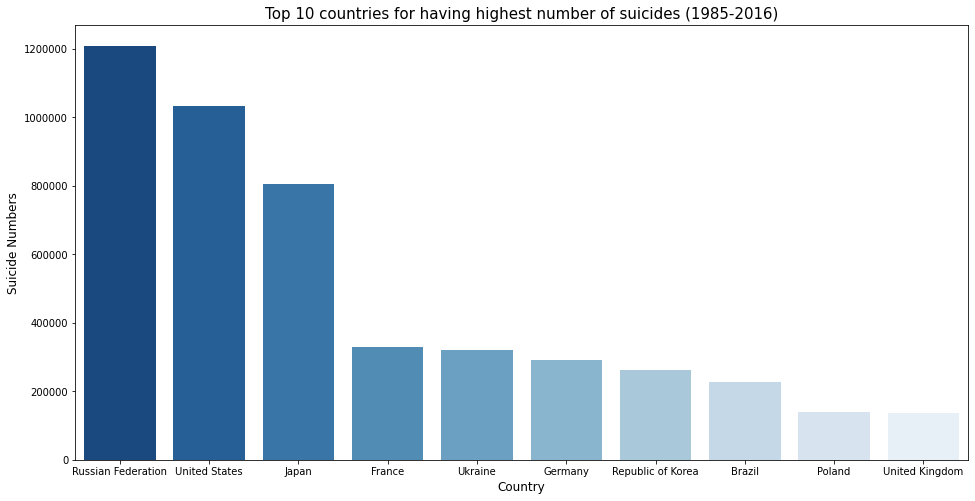

In [21]:
from pyspark.sql.functions import sum, desc
grouped_country = data_clean.groupby("country")\
.agg(sum("suicides_no").alias("sum_suicides_no"))\
.sort(desc("sum_suicides_no"))

pd_df = grouped_country.limit(10).toPandas()

f,ax = plt.subplots(1,1,figsize = (16,8))
ax = sns.barplot(x = pd_df['country'], y = "sum_suicides_no", data = pd_df, palette = 'Blues_r' )
plt.ticklabel_format(style= 'plain', axis = 'y')
plt.xlabel("Country",size = 12)
plt.ylabel("Suicide Numbers",size = 12)
plt.title("Top 10 countries for having highest number of suicides (1985-2016)", size = 15)
plt.show()



Countires that have highest number of suicides rate are:
1. Russian Federation:
The dissolution of the Soviet Union, makert reforms and falling incomes among the population resulted in an increase in suicide mortality, reaching peak levels in the year 1994 - 1995.
2. United States
3. Japan 



Let's try to figure out what we can get from the Generation column

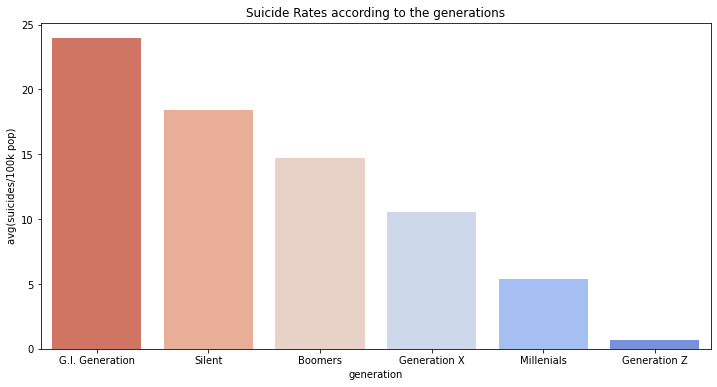

In [22]:
grouped_generation  = data_clean.groupby("generation").mean("suicides/100k pop").sort(desc("avg(suicides/100k pop)"))

pd_df = grouped_generation.toPandas()

fig, ax = plt.subplots(figsize = (12,6))
sns.barplot(x = 'generation', y ='avg(suicides/100k pop)', data = pd_df, palette= 'coolwarm_r' )
plt.title("Suicide Rates according to the generations")
plt.show()

G.I Generation = Greatest Generation right after World War 2 <br>
Silent Generation = People who were born between 1928 - 1945 <br>
Boomers =  Defined as people born from 1946 to 1964 <br>
Generation X = Defined as people born between 1965 and 1980 <br>

As we can see, the G.I. Generation or the Greatest Generation (the generation who lived during the WWII) has the highest suicide rate with almost 25 suicides per 100,000 person. This is a very big number compared to younger generations, this might be due to the fact that this generation suffered a lot during the WWII, many of them lost their loved ones and experienced different traumatic events. The suicide rates decrease from a generation to another, where Generation Z has the lowest suicide rates with 1 suicide per 100,000 person. 

Text(0.5, 0.98, 'Suicide by sex and age category (1985-2015)')

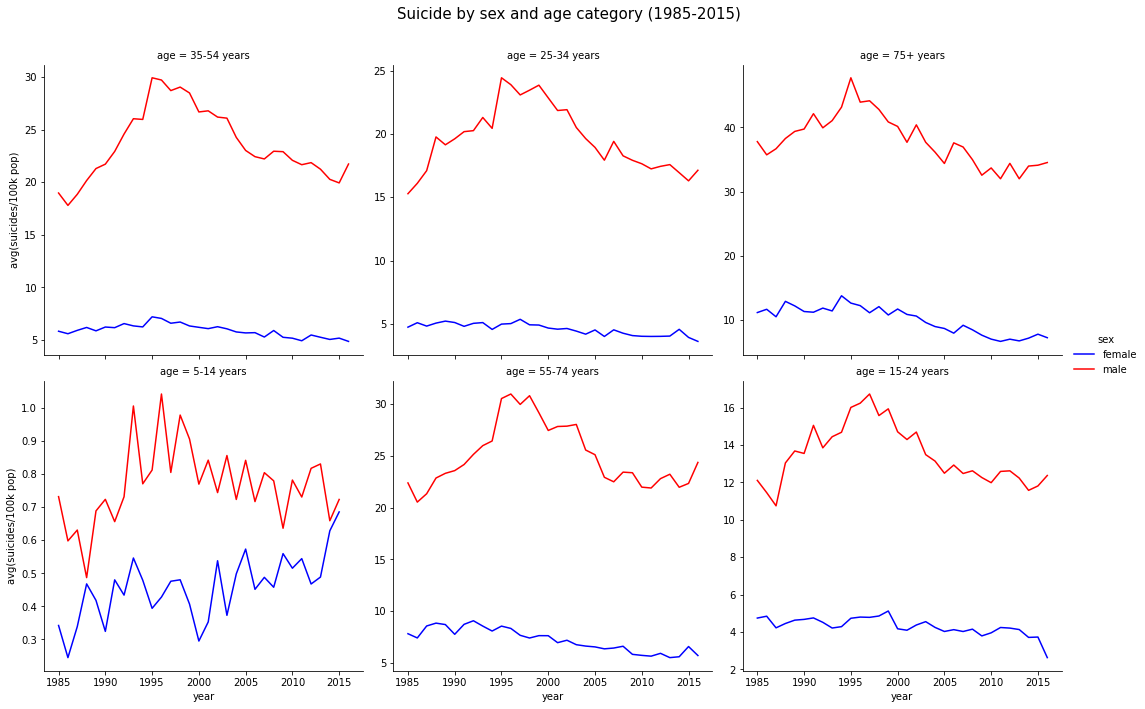

In [23]:
grouped_year_age_sex = data_clean.groupBy(["year","sex","age"]).mean("suicides/100k pop")

#converting to Pandas df
pd_df = grouped_year_age_sex.toPandas()

pd_df["suicides/100k pop"] = pd_df.index
sns.relplot(x = 'year',y = "avg(suicides/100k pop)", hue = 'sex',col = 'age',col_wrap = 3, data = pd_df,
           facet_kws = dict(sharey = False),kind = "line",palette=["b", "r"])
plt.subplots_adjust(top = 0.9)
plt.suptitle("Suicide by sex and age category (1985-2015)", size = 15)



## Buling the Machine Learning Model

String Indexer - Use it if you want the Machine Learning algorithm to identify column as categorical variable or if want to convert the textual data to numeric data keeping the categorical context.

VectorAssembler is a transformer that combines a given list of columns into a single vector column.
It is useful for combining raw features and features generated by different feature transformers into a single feature vector, in order to train ML models like logistic regression and decision trees.

In [24]:
data_clean.printSchema()

root
 |-- country: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- sex: string (nullable = true)
 |-- age: string (nullable = true)
 |-- suicides_no: integer (nullable = true)
 |-- population: integer (nullable = true)
 |-- suicides/100k pop: float (nullable = true)
 |-- gdp_per_capita ($): integer (nullable = true)
 |-- generation: string (nullable = true)



**1. Using String Indexer to convert all categorical columns to numerical**

In [25]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml.feature import VectorAssembler

In [26]:
indexer = StringIndexer(inputCol="country", outputCol= "country_cat")
indexed = indexer.fit(data_clean).transform(data_clean)

In [27]:
indexer = StringIndexer(inputCol="sex", outputCol= "sex_cat")
indexed = indexer.fit(indexed).transform(indexed)

In [28]:
indexer = StringIndexer(inputCol="age", outputCol= "age_cat")
indexed = indexer.fit(indexed).transform(indexed)

In [29]:
indexer = StringIndexer(inputCol="generation", outputCol= "generation_cat")
indexed = indexer.fit(indexed).transform(indexed)

In [30]:
indexed.show(5)

+-------+----+------+-----------+-----------+----------+-----------------+------------------+---------------+-----------+-------+-------+--------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|gdp_per_capita ($)|     generation|country_cat|sex_cat|age_cat|generation_cat|
+-------+----+------+-----------+-----------+----------+-----------------+------------------+---------------+-----------+-------+-------+--------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71|               796|   Generation X|       63.0|    1.0|    0.0|           0.0|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19|               796|         Silent|       63.0|    1.0|    2.0|           1.0|
|Albania|1987|female|15-24 years|         14|    289700|             4.83|               796|   Generation X|       63.0|    0.0|    0.0|           0.0|
|Albania|1987|  male|  75+ years|          1|     21800|             4.59|        

**2. Using VectorAssembler to combines a given list of columns into a single vector column**

In [31]:
assembler = VectorAssembler(inputCols=['country_cat',
 'sex_cat',
 'age_cat',
 'generation_cat','year','suicides_no',
 'population',
 'gdp_per_capita ($)'], outputCol= "features")

output = assembler.transform(indexed)

In [32]:
output.show(5)

+-------+----+------+-----------+-----------+----------+-----------------+------------------+---------------+-----------+-------+-------+--------------+--------------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|gdp_per_capita ($)|     generation|country_cat|sex_cat|age_cat|generation_cat|            features|
+-------+----+------+-----------+-----------+----------+-----------------+------------------+---------------+-----------+-------+-------+--------------+--------------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71|               796|   Generation X|       63.0|    1.0|    0.0|           0.0|[63.0,1.0,0.0,0.0...|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19|               796|         Silent|       63.0|    1.0|    2.0|           1.0|[63.0,1.0,2.0,1.0...|
|Albania|1987|female|15-24 years|         14|    289700|             4.83|               796|   Generation X|       63.0|    0.0| 

**3. Standardising the Data**

StandardScaler performs the task of Standardization. Usually a dataset contains variables that are different in scale. For e.g. an Employee dataset will contain AGE column with values on scale 20-70 and SALARY column with values on scale 10000-80000.
As these two columns are different in scale, they are Standardized to have common scale while building machine learning model.

In [33]:
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures",
                        withStd=True, withMean=False)

scalerModel = scaler.fit(output)
scaledData = scalerModel.transform(output)

scaledData.select("scaledFeatures","suicides/100k pop")

DataFrame[scaledFeatures: vector, suicides/100k pop: float]

In [34]:
scaledData.show()

+-------+----+------+-----------+-----------+----------+-----------------+------------------+---------------+-----------+-------+-------+--------------+--------------------+--------------------+
|country|year|   sex|        age|suicides_no|population|suicides/100k pop|gdp_per_capita ($)|     generation|country_cat|sex_cat|age_cat|generation_cat|            features|      scaledFeatures|
+-------+----+------+-----------+-----------+----------+-----------------+------------------+---------------+-----------+-------+-------+--------------+--------------------+--------------------+
|Albania|1987|  male|15-24 years|         21|    312900|             6.71|               796|   Generation X|       63.0|    1.0|    0.0|           0.0|[63.0,1.0,0.0,0.0...|[2.50531438222025...|
|Albania|1987|  male|35-54 years|         16|    308000|             5.19|               796|         Silent|       63.0|    1.0|    2.0|           1.0|[63.0,1.0,2.0,1.0...|[2.50531438222025...|
|Albania|1987|female|15-2

In [35]:
#selecting the scaledFeature and Target feature that is suicide/100k pop from the ScaledData dataframe
model_df = scaledData.select("scaledFeatures","suicides/100k pop")
#model_df.show(5)

**4. Splitting 80% of the data for training and 20% for testing**

In [36]:
training_df, test_df = model_df.randomSplit([0.8,0.2])
print("Count of training data: ", training_df.count())
print("Count of testing data: ", test_df.count())

Count of training data:  22286
Count of testing data:  5534


**5. Model fitting - Linear Regression**

In [37]:
#import pyspark ml libraries
from pyspark.ml.regression import LinearRegression

#generating the LR object on the features
linear_reg = LinearRegression(featuresCol = "scaledFeatures", labelCol="suicides/100k pop")

#fit the model on training dataframe
lr_model = linear_reg.fit(training_df)

**6. Predicting the test values**

In [38]:
lr_predictions = lr_model.transform(test_df)
lr_predictions.select("prediction","suicides/100k pop","scaledFeatures").show(5)

from pyspark.ml.evaluation import RegressionEvaluator

lr_evaluator = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="suicides/100k pop",metricName="r2")

print("R Squared (R2) on test data = %g" % 
      lr_evaluator.evaluate(lr_predictions))

+-----------------+-----------------+--------------------+
|       prediction|suicides/100k pop|      scaledFeatures|
+-----------------+-----------------+--------------------+
|7.953364333983302|              0.0|(8,[0,4,6,7],[0.0...|
|7.700857245398112|              0.0|(8,[0,4,6,7],[0.5...|
|7.706891144665519|              0.0|(8,[0,4,6,7],[0.5...|
|7.412691003629277|              0.0|(8,[0,4,6,7],[0.5...|
|7.262195045569769|              0.0|(8,[0,4,6,7],[0.5...|
+-----------------+-----------------+--------------------+
only showing top 5 rows

R Squared (R2) on test data = 0.246892


In order to compare them to the real values, we will plot them in the same figure. The values should be aligned on a 45° dergrees line.

In [39]:
#selecting 'prediction' columns (which are the predicted values) from lr_prediction 
# selecting 'suicides/100k pop' column (which are actual values) from test_df
predicted = lr_predictions.select("prediction")
actual = test_df.select("suicides/100k pop")

#converting both of them to Pandas df for plotting
predicted_pandas = predicted.toPandas()
actual_pandas = actual.toPandas()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


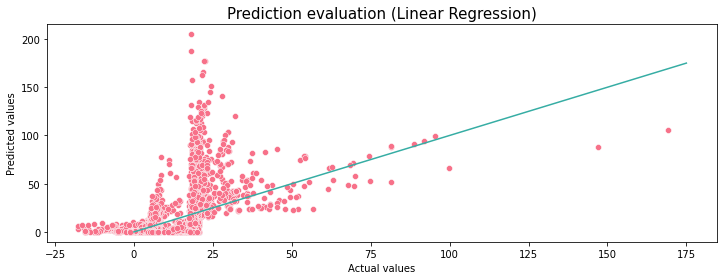

In [40]:
from IPython.core.pylabtools import figsize

fig, ax = plt.subplots(figsize=(12,4))
sns.scatterplot(predicted_pandas["prediction"],actual_pandas["suicides/100k pop"], ax = ax, color = sns.husl_palette(10)[0])
sns.lineplot([0, 175], [0, 175],color=sns.husl_palette(10)[5], ax=ax)
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Linear Regression)', size=15)
plt.show()

Our model doesn't seem to be doing a good job, this might be due to fact that the features we selected aren't good enough, or it might be due the fact that the data we have isn't linear so a similar model won't be any good to estimate the values.

**Future Scope : I can try to train the data with other machine learning models may be a decision tree will perform better**